<a href="https://colab.research.google.com/github/1st-award/andong_2021_2_1/blob/main/Python/%ED%95%84%EA%B8%B0%20%EC%82%AC%EB%B3%B8/%EA%B3%B5%EA%B3%B5%EB%8D%B0%EC%9D%B4%ED%84%B0%ED%99%9C%EC%9A%A9_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 안동 기온 데이터 분석(1973/01/01 ~ 2020/12/31)

## 공공 데이터 얻기
1. 기상자료개방포털(https://data.kma.go.kr/)접속
2. 기후통계분석 >> 통계분석 >> 기온분석 메뉴로 들어가서
3. 기간 설정: 1973년 1월 1일부터 2020년 12월 31일까지
4. 지역: 경상북도 안동
5. 검색 버튼 클릭
6. 그래프가 나타나면[Excel] 버튼 클릭
7. 'andongTemp.xls'라는 이름으로 저장
8. 다운로드한 xls파일을 메모장 프로그램으로 열고 1~7행을 모두 삭제한 후 'Excel 통합 문서(*.xlsx)'형식으로 다시 저장
9. andongTemp.xlsx 파일을 현재 작업중인 구글 드라이브에 업로드한다.

- csv: comma-separated values, 몇 가지 필드를 쉼표로 구분한 텍스트 데이터 및 텍스트 파일

## EXCEL 파일 열기

In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

temp_data =pd.read_excel('/gdrive/My Drive/Python/andongTemp.xlsx')
temp_data

In [ ]:
# '지점' 컬럼 삭제하고 '날짜' 컬럼을 인덱스로 설정
temp_data.drop('지점', axis=1, inplace=True)
temp_data.set_index('날짜', inplace=True)
temp_data

## 1973년 1월 1일 이후 안동의 최고 기온을 상자 그래프로 표시

### 상자 그래프(boxplot)를 그려서 기상 관측 이래 안동의 하루 중 최고 기온의 범위 파악

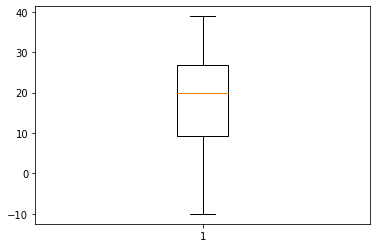

In [ ]:
high_temp = np.array(temp_data.loc[:, '최고기온(℃)'])
plt.boxplot(high_temp)
plt.show()

## 1973년 이후 안동의 1월과 8월의 최고 기온을 히스토그램으로 그리기

In [ ]:
jan = []
aug = []
for i in range(len(temp_data)):
  month = str(temp_data.index[i]).split('-')[1]
  if month == '01' :
    jan.append(temp_data.iloc[i][-1])
  elif month == '08':
    aug.append(temp_data.iloc[i][-1])

plt.hist(jan, bins=50, color='b', label='Jan')
plt.hist(aug, bins=50, color='r', label='Aug')
plt.legend()
plt.show()

## 1973년 이후 안동의 1월과 8월의 최고 기온을 상자 그래프로 그리기

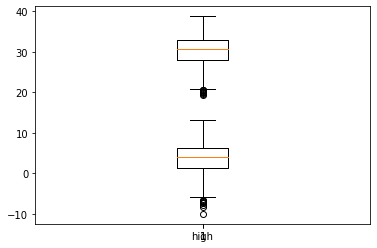

In [ ]:
jan = []
aug = []
for i in range(len(temp_data)):
  month = str(temp_data.index[i]).split('-')[1]
  if month == '01' :
    jan.append(temp_data.iloc[i][-1])
  elif month == '08':
    aug.append(temp_data.iloc[i][-1])
plt.xticks([1], ['high'])
plt.boxplot(jan)
plt.boxplot(aug)
plt.show()

상자 그래프의 위, 아래에 그려진 동그라미는 이상치(outlier)를 표현한 것으로 다른 수치에 비하여 너무 크거나 작은 값들을 자동으로 나타낸 것

In [ ]:
jan = []
aug = []
for i in range(len(temp_data)):
  month = str(temp_data.index[i]).split('-')[1]
  if month == '01' :
    jan.append(temp_data.iloc[i][-1])
  elif month == '08':
    aug.append(temp_data.iloc[i][-1])
plt.xticks([1, 2], ['Jan', 'Aug'])
plt.boxplot([jan, aug])
plt.show()

## 한글 폰트 설치

In [ ]:
# 폰트 설치
!apt -qq -y install fonts-nanum
!apt-get install fonts-nanum* -qq

[런타임] - [런타임 다시 시작]

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm

plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.size'] = 12
fm._rebuild()

아래의 코드를 다시 실행

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
temp_data = pd.read_excel('/gdrive/My Drive/Python/andongTemp.xlsx')
# '지점' 컬럼 삭제하고 '날짜' 컬럼을 인덱스로 설정
temp_data.drop('지점', axis=1, inplace=True)
temp_data.set_index('날짜', inplace=True)
temp_data

In [ ]:
jan = []
aug = []
for i in range(len(temp_data)):
  month = str(temp_data.index[i]).split('-')[1]
  if month == '01' :
    jan.append(temp_data.iloc[i][-1])
  elif month == '08':
    aug.append(temp_data.iloc[i][-1])
plt.title('안동 지역 1월과 8월의 최고 기온 분석')
plt.xticks([], ['1월', '8월'])
plt.boxplot([jan, aug])
plt.show()

In [ ]:
# 마이너스 부호 깨짐 현상 없애기
plt.rcParams['axes.unicode_minus'] = False

## 안동 지역 월별 최고 기온 분석

In [ ]:
month = [[], [], [], [], [], [], [], [], [], [], [], []]
for i in range(len(temp_data)):
  m = int(str(temp_data.index[i]).split('-')[1])-1
  month[m].append(float(temp_data.iloc[i][-1]))

plt.rcParams["figure.figsize"] = (12, 6)
plt.title("안동 지역 월별 최고 기온 분석")
plt.boxplot(month)
plt.show()

In [ ]:
month = [[], [], [], [], [], [], [], [], [], [], [], []]
for i in range(len(temp_data)):
  m = int(str(temp_data.index[i]).split('-')[1])-1
  month[m].append(float(temp_data.iloc[i][-1]))

plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (12, 6)
plt.title("안동 지역 월별 최고 기온 분석")
plt.boxplot(month)
plt.show()